## Atividade: Banda Larga Sergipe


### Disponível também no repositório https://github.com/Jownao/dive_datascience

A base possui os seguintes atributos: 

* **ano**: Ano correspondente aos dados.
* **mes**: Mês correspondente aos dados.
* **sigla_uf**: Sigla do estado (nesse caso assume somente SE).
* **cnpj**: CNPJ da empresa que oferece o serviço de banda larga.
* **empresa**: Nome da empresa que oferece o serviço de banda larga. 
* **porte_empresa**: Porte que caracteriza a empresa que fornece o serviço de banda larga. Assume os valores `Pequeno Porte` e `Grande Porte`.
* **tecnologia**: Tecnologia utilizada para o prover o serviço de banda larga. Assume os valores: `'ETHERNET', 'Wi-Fi', 'Fibra', 'FTTH', 'xDSL', 'FWA', 'Cable Modem', 'VSAT', 'HFC', 'FR', 'ATM', 'LTE', 'FTTB', 'ADSL2', 'SAT', 'HDSL', 'Indeterminado', 'Outra', 'ADSL1', 'WIMAX', 'TDMA', 'MMDS', 'Híbrido', 'NR', 'DWDM', 'PLC', 'OFDMA/TDD'`.
* **transmissao**: Meios de transmissão da banda larga. Assume os valores: `['Cabo Metálico', 'Rádio', 'Fibra', 'Cabo Coaxial', 'Satélite', 'LTE', 'Indeterminado', 'Outra', 'Híbrido']`.
* **velocidade**: Classificação da velocidade contratada. Assume os valores: `['2Mbps a 12Mbps', '512kbps a 2Mbps', '12Mbps a 34Mbps', '> 34Mbps', '0Kbps a 512Kbps', '64Kbps a 512Kbps', '0Kbps a 64Kbps', '2Mbps a 34Mbps']`.
* **acessos**: Número total de contratos da empresa para uma tecnologia, transmissao e velocidade em um determinando mês e ano.

In [66]:
# Importação de pacotes necessários para este laboratório

import seaborn as sns # Biblioteca de Visualização
import matplotlib.pyplot as plt # Biblioteca de Visualização
import pandas as pd # Biblioteca Pandas manipular os dados
import numpy as np # Biblioteca para trabalhar com números

# Função para ajudar na exibição dos gráficos
def convert_sums_frame(sums_object, columns):
    frame_ = pd.DataFrame(sums_object)
    frame_.reset_index(inplace=True)
    frame_.columns = columns
    return frame_

# Função para retornar porcentagem em gráficos
def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return "{:.0f}%\n({:d})".format(pct, absolute)
    
# Paleta de cores para os gráficos
colors = sns.color_palette('muted')[2:20]

## Analisando o Estado

* Como está distribuído o número de acessos de acordo com os atributos apresentados? 
* Quais as características em relação a tecnologia, transmissão e velocidade que predomina no estado hoje em dia?
* Como essas características mudaram ao longo do ano?
* Quais empresas com maior número de contratos considerando o porte da empresa? 
* Como o perfil do tipo de empresa mudou ao longo dos anos nos estados? Houve crescimento ou redução em relação a um tipo de porte específico?

In [3]:
#Analisando o estado
data = pd.read_csv("../datasets/02_banda_larga/microdados_se.csv")
data_estado = data.drop(columns=["id_municipio"])
data_estado = data_estado.groupby(by=["ano","mes","sigla_uf","cnpj","empresa","porte_empresa","tecnologia","transmissao","velocidade"], as_index=False).sum()
data_estado 

,ano,mes,sigla_uf,cnpj,empresa,porte_empresa,tecnologia,transmissao,velocidade,acessos
0,2007,3,SE,2041460000193,OI,Grande Porte,FTTH,Fibra,64Kbps a 512Kbps,1
1,2007,3,SE,2041460000193,OI,Grande Porte,Outra,Outra,64Kbps a 512Kbps,1
2,2007,3,SE,3721699000177,GLOINFO 500 SOLUCOES EM TELEMATICA LTDA,Pequeno Porte,Wi-Fi,Rádio,0Kbps a 64Kbps,25
3,2007,3,SE,3721699000177,GLOINFO 500 SOLUCOES EM TELEMATICA LTDA,Pequeno Porte,Wi-Fi,Rádio,64Kbps a 512Kbps,18
4,2007,3,SE,3964292000170,CLARO,Grande Porte,SAT,Satélite,64Kbps a 512Kbps,21
...,...,...,...,...,...,...,...,...,...,...
31384,2022,2,SE,76535764000143,OI,Grande Porte,HDSL,Cabo Metálico,512kbps a 2Mbps,172
31385,2022,2,SE,76535764000143,OI,Grande Porte,HDSL,Cabo Metálico,> 34Mbps,4
31386,2022,2,SE,76535764000143,OI,Grande Porte,VSAT,Satélite,0Kbps a 512Kbps,2
31387,2022,2,SE,76535764000143,OI,Grande Porte,VSAT,Satélite,2Mbps a 12Mbps,4


### Churros

In [4]:
data_estado.describe() #Dados dispostos

,ano,mes,cnpj,acessos
count,31389.000000,31389.000000,3.138900e+04,31389.000000
mean,2017.551085,6.552964,1.991575e+13,741.290038
std,3.331286,3.496340,1.597114e+13,3099.037607
min,2007.000000,1.000000,3.367010e+11,1.000000
25%,2015.000000,3.000000,7.565239e+12,9.000000
50%,2018.000000,7.000000,1.377680e+13,57.000000
75%,2020.000000,10.000000,3.300012e+13,320.000000
max,2022.000000,12.000000,9.753154e+13,49653.000000


In [5]:
data_estado.dtypes
# Convertendo os atributos para categórico
data_estado[['cnpj','ano','mes']] = data_estado[['cnpj','ano','mes']].astype("category")
data_estado.dtypes

ano              category
mes              category
sigla_uf           object
cnpj             category
empresa            object
porte_empresa      object
tecnologia         object
transmissao        object
velocidade         object
acessos             int64
dtype: object

In [6]:
# Data atual
empresa_atual = data_estado.query("ano == 2022 and mes == 2")

In [52]:
# Trend de contratos 2007- 2021
data_mes = data_estado.query('mes == 12')
data_mes = data_mes.groupby(["porte_empresa","ano"])['acessos'].sum()
data_mes = convert_sums_frame(data_mes, ['porte_empresa','ano','acessos'])



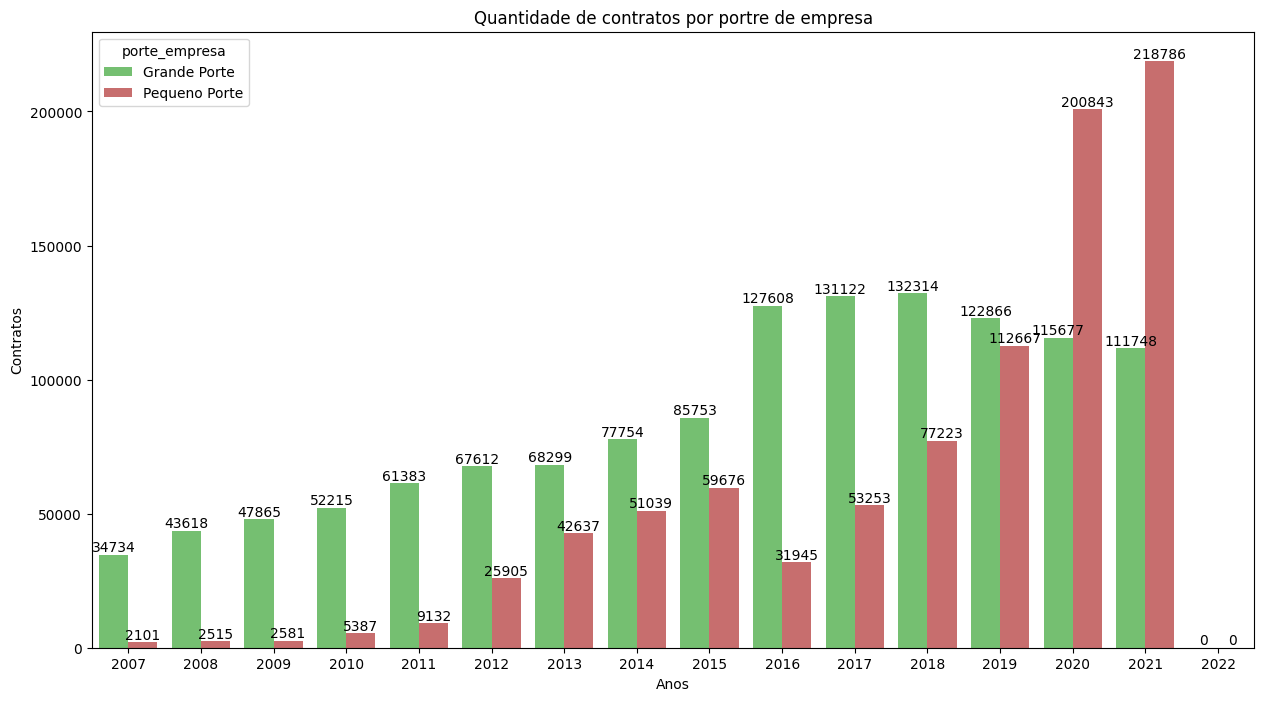

In [61]:
# Trend de contratos 2007- 2021 (POR PORTE DE EMPRESA)
bar = sns.barplot(data=data_mes, x="ano",y="acessos", hue="porte_empresa", palette=colors)
bar.set(xlabel='Anos',ylabel='Contratos')
plt.title('Quantidade de contratos por portre de empresa')
plt.rcParams["figure.figsize"] = (15, 8)
bar.bar_label(bar.containers[0])
bar.bar_label(bar.containers[1])
plt.show()

In [62]:
# Trend de contratos 2007- 2021
data_mes = data_estado.query('mes == 12')
data_mes = data_mes['acessos'].groupby(data_mes["ano"]).sum().reset_index(name='Count')
data_mes.drop(15, inplace = True)

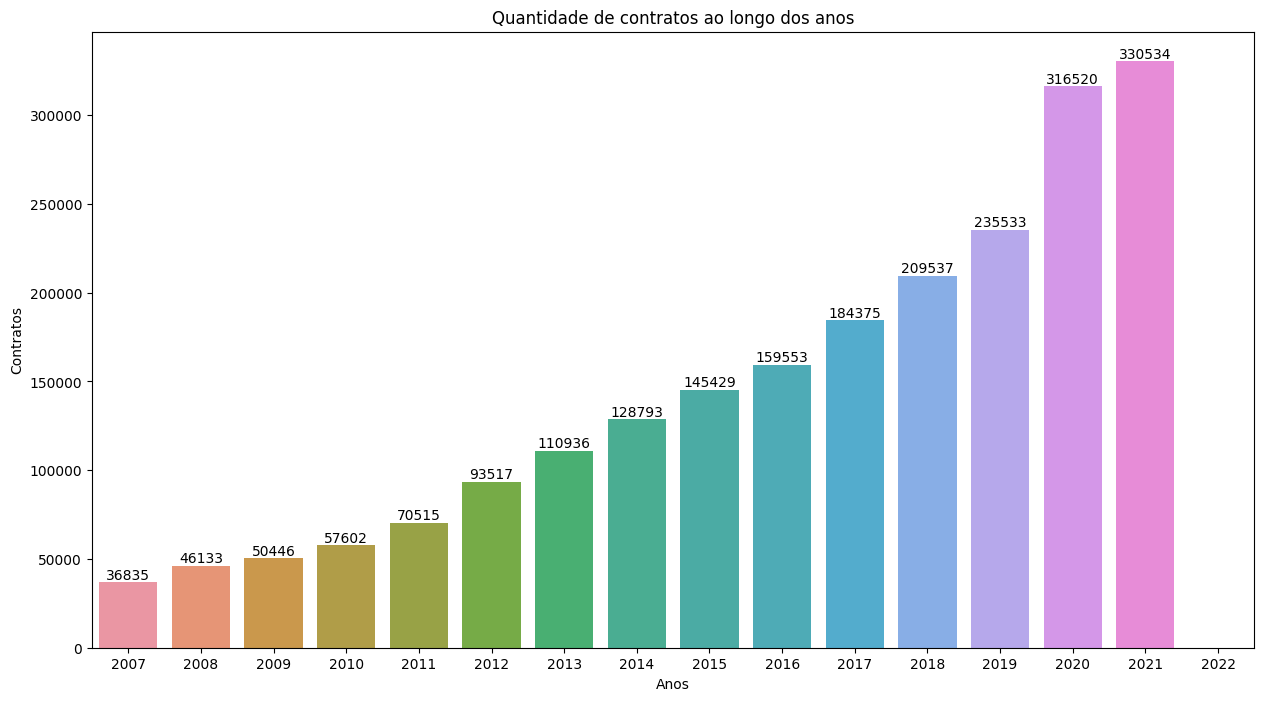

In [63]:
# Trend de contratos 2007- 2021
bar = sns.barplot(data=data_mes, x="ano",y="Count")
bar.set(xlabel='Anos',ylabel='Contratos')
plt.title('Quantidade de contratos ao longo dos anos')
plt.rcParams["figure.figsize"] = (10, 6)
bar.bar_label(bar.containers[0])
plt.show()

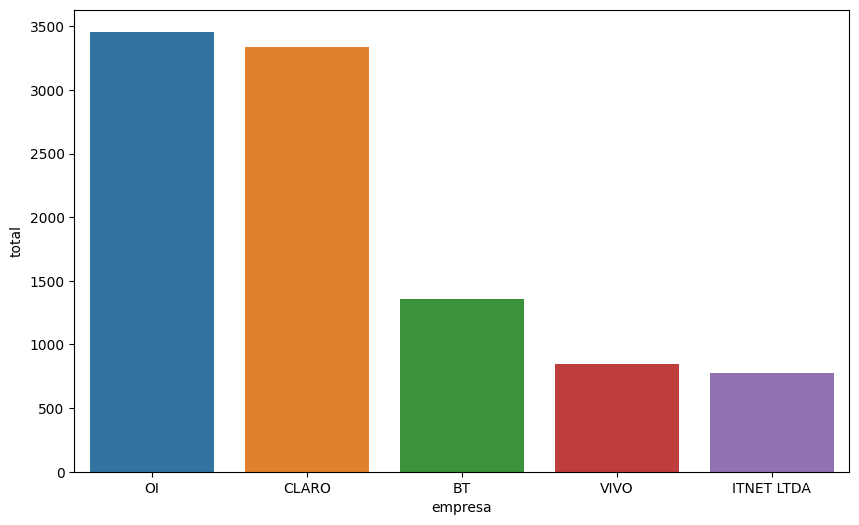

In [10]:
#Top 5 empresas 
counts_empresa = data_estado[['empresa']].value_counts()
frame_acessos = convert_sums_frame(counts_empresa, ['empresa','total'])
frame_acessos_5 = frame_acessos.head()
frame_acessos_5

sns.barplot(data=frame_acessos_5, x="empresa",y="total", palette=colors)
plt.show()

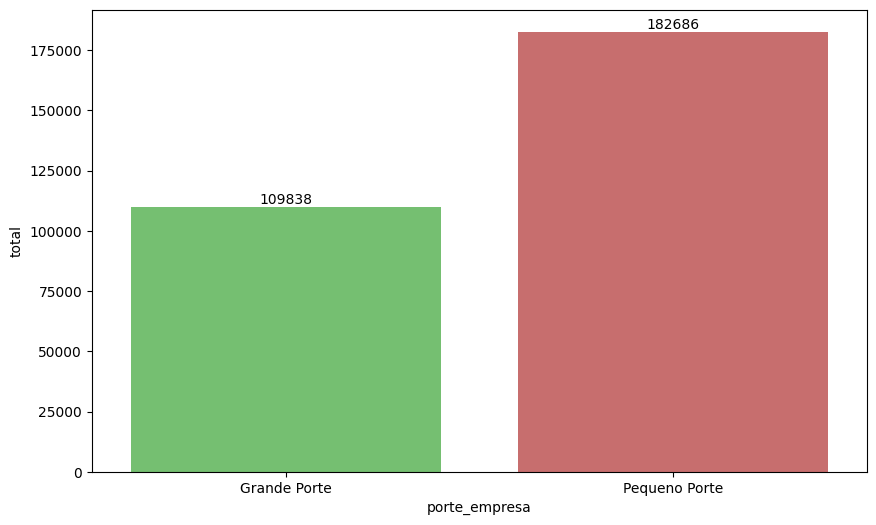

In [67]:
# Contratos x Porte empresa

counts_porte = empresa_atual.groupby("porte_empresa")['acessos'].sum()
frame_porte = convert_sums_frame(counts_porte, ['porte_empresa','total'])
frame_porte

bar = sns.barplot(data=frame_porte, x="porte_empresa",y="total", palette=colors)
bar.bar_label(bar.containers[0])
plt.show()

In [ ]:
#Empresa x Acessos
sum_empresa = data_estado.groupby("empresa")['acessos'].sum()
fsum_empresa = convert_sums_frame(sum_empresa, ['empresa','acessos'])
acessos5 = fsum_empresa.sort_values(by='acessos', ascending=False ).head()
acessos5

,empresa,acessos
161,OI,7536240
38,CLARO,3263829
227,VIVO,2703892
78,GVT,1118468
87,ISW PROVEDOR DE INTERNET LTDA,883999


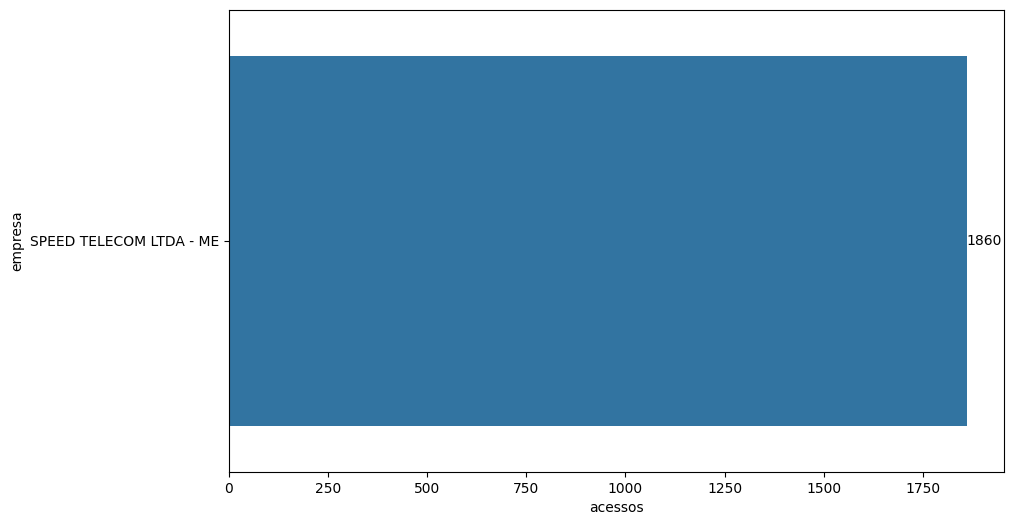

In [64]:
# Minha internet - teste

data_estado.loc[(data_estado['empresa']) == 'SPEED TELECOM LTDA - ME']

teste = data_estado.query("ano == 2022 and mes == 2 and empresa == 'SPEED TELECOM LTDA - ME'")


empresa_x = teste.groupby("empresa")['acessos'].sum()
fsum_empresa_x = convert_sums_frame(empresa_x, ['empresa','acessos'])
acessos5_x = fsum_empresa_x.sort_values(by='acessos', ascending=False ).head()


bar = sns.barplot(data=acessos5_x, x="acessos",y="empresa", palette=colors)
bar.bar_label(bar.containers[0])
plt.show()


In [ ]:
#Counts de algumas colunas

counts_empresa = empresa_atual[['empresa']].value_counts()
frame_empresa = convert_sums_frame(counts_empresa, ['empresa','total'])
frame_empresa

counts_acessos = empresa_atual[['acessos']].value_counts()
frame_acessos = convert_sums_frame(counts_acessos, ['acessos','total'])
frame_acessos

counts_tecnologia = empresa_atual[['tecnologia']].value_counts()
frame_tecnologia = convert_sums_frame(counts_tecnologia, ['tecnologia','total'])
frame_tecnologia

counts_transmissao = empresa_atual[['transmissao']].value_counts()
frame_transmissao = convert_sums_frame(counts_transmissao, ['transmissao','total'])
frame_transmissao

counts_velocidade = empresa_atual[['velocidade']].value_counts()
frame_velocidade = convert_sums_frame(counts_velocidade, ['velocidade','total'])
frame_velocidade

### 1 e 2 Questão

* Como está distribuído o número de acessos de acordo com os atributos apresentados?
* Quais as características em relação a tecnologia, transmissão e velocidade que predomina no estado hoje em dia?

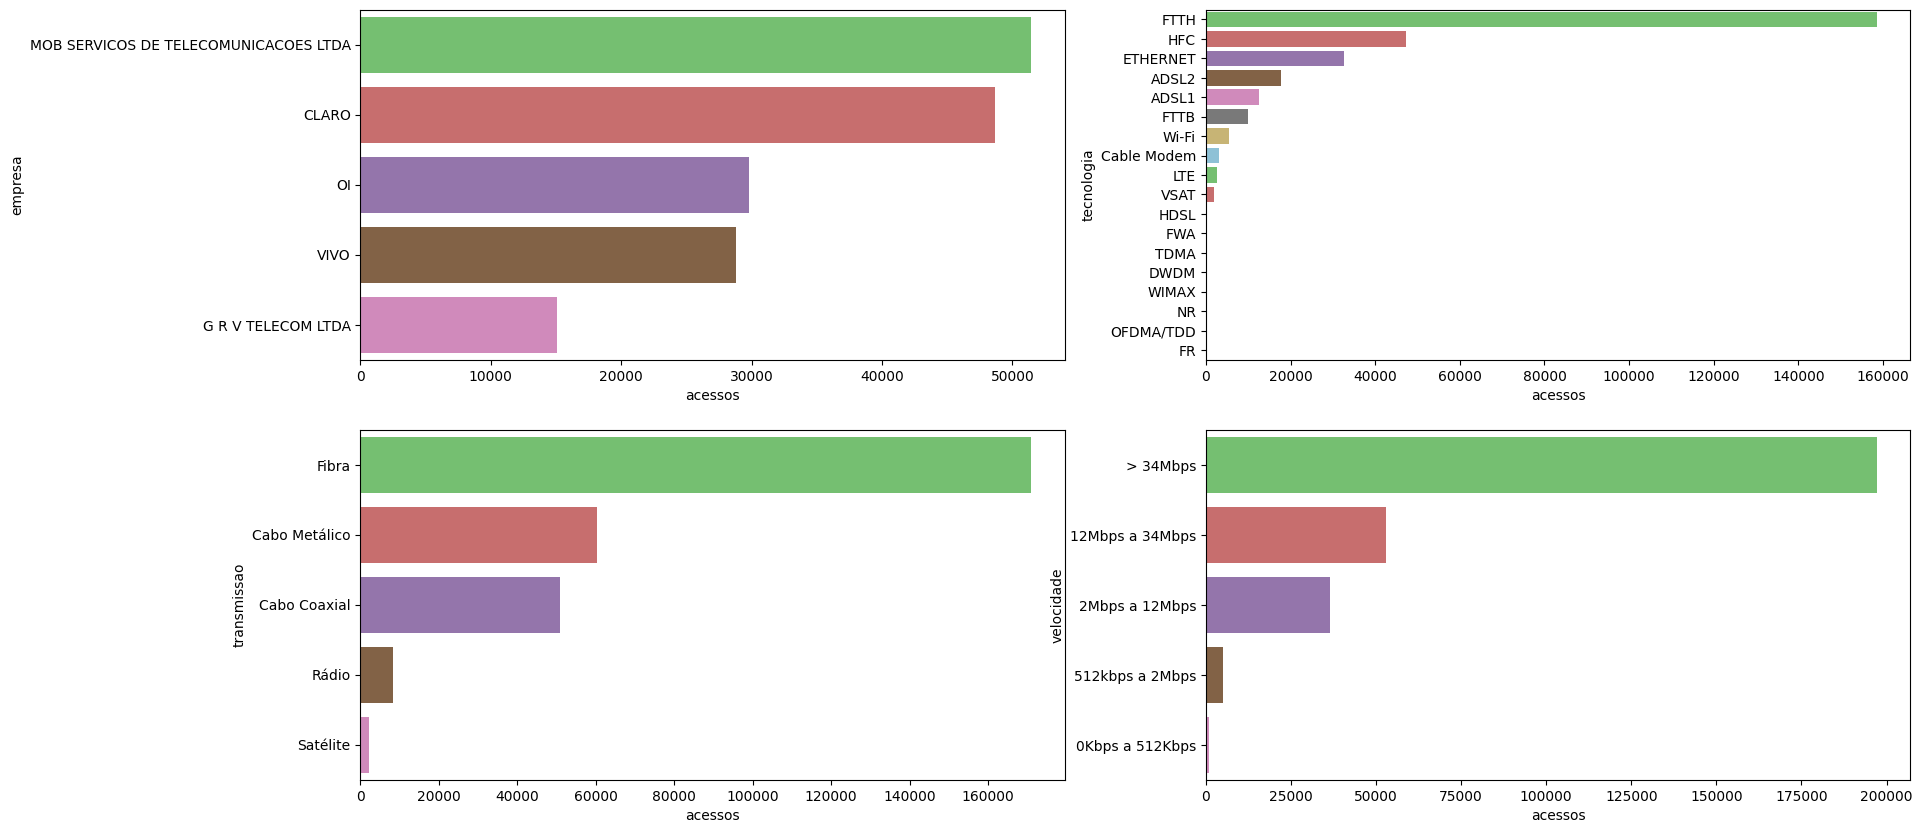

In [68]:
# Número de acessos com outros atributos - Relação

# Data atual
empresa_atual = data_estado.query("ano == 2022 and mes == 2")


sum_empresa = empresa_atual.groupby("empresa")['acessos'].sum()
frame_sum_empresa = convert_sums_frame(sum_empresa, ['empresa','acessos'])
frame_sum_empresa = frame_sum_empresa.sort_values(by='acessos', ascending=False)


cinco_mais = frame_sum_empresa[:5]


sum_tecnologia = empresa_atual.groupby("tecnologia")['acessos'].sum()
frame_sum_tecnologia = convert_sums_frame(sum_tecnologia, ['tecnologia','acessos'])
frame_sum_tecnologia = frame_sum_tecnologia.sort_values(by='acessos', ascending=False)

sum_transmissao = empresa_atual.groupby("transmissao")['acessos'].sum()
frame_sum_transmissao = convert_sums_frame(sum_transmissao, ['transmissao','acessos'])
frame_sum_transmissao = frame_sum_transmissao.sort_values(by='acessos', ascending=False)

sum_velocidade = empresa_atual.groupby("velocidade")['acessos'].sum()
frame_sum_velocidade = convert_sums_frame(sum_velocidade, ['velocidade','acessos'])
frame_sum_velocidade = frame_sum_velocidade.sort_values(by='acessos', ascending=False)

fig, axs = plt.subplots(ncols=2,nrows=2,figsize=(20,10))
sns.barplot(data=cinco_mais,x='acessos',y='empresa',ax=axs[0][0],palette=colors)
sns.barplot(data=frame_sum_tecnologia,x='acessos', y='tecnologia',ax=axs[0][1],palette=colors)
sns.barplot(data=frame_sum_transmissao,x='acessos',y='transmissao',ax=axs[1][0],palette=colors)
sns.barplot(data=frame_sum_velocidade,x='acessos',y='velocidade',ax=axs[1][1],palette=colors)

plt.show()

### 3 e 5 Questão

* Como essas características mudaram ao longo do ano?

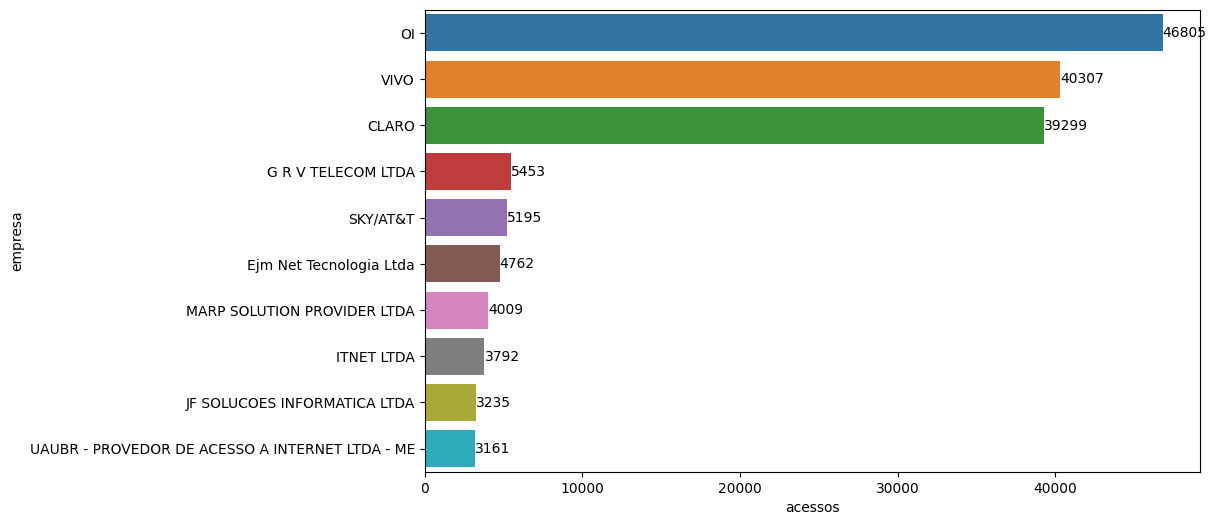

In [18]:
# Empresa x Acessos em 2019
empresa_acessos_2019 = data_estado.query("ano == 2019 and mes == 2")
empresa_acessos_2019

empresa_2019 = empresa_acessos_2019.groupby("empresa")['acessos'].sum()
fsum_empresa_2019 = convert_sums_frame(empresa_2019, ['empresa','acessos'])
acessos5_2019 = fsum_empresa_2019.sort_values(by='acessos', 
                      ascending=False ).head(10)
acessos5_2019

bar = sns.barplot(data=acessos5_2019, x="acessos",y="empresa", palette=colors)
bar.bar_label(bar.containers[0])
plt.show()

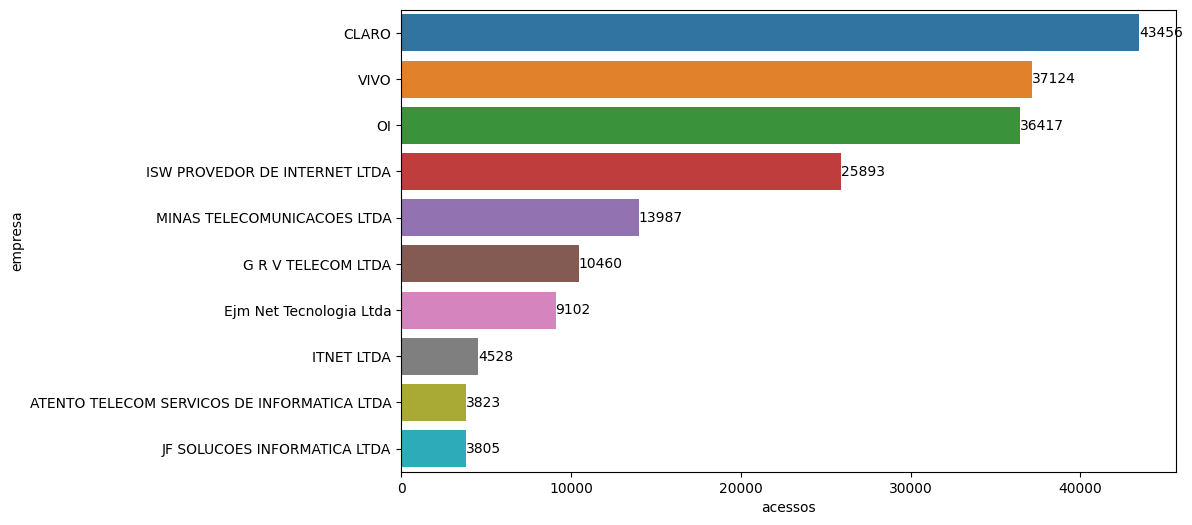

In [19]:
# Empresa x Acessos em 2020
empresa_acessos_2020 = data_estado.query("ano == 2020 and mes == 2")
empresa_acessos_2020

empresa_2020 = empresa_acessos_2020.groupby("empresa")['acessos'].sum()
fsum_empresa_2020 = convert_sums_frame(empresa_2020, ['empresa','acessos'])
acessos5_2020 = fsum_empresa_2020.sort_values(by='acessos', 
                      ascending=False ).head(10)
acessos5_2020

bar = sns.barplot(data=acessos5_2020, x="acessos",y="empresa", palette=colors)
bar.bar_label(bar.containers[0])
plt.show()

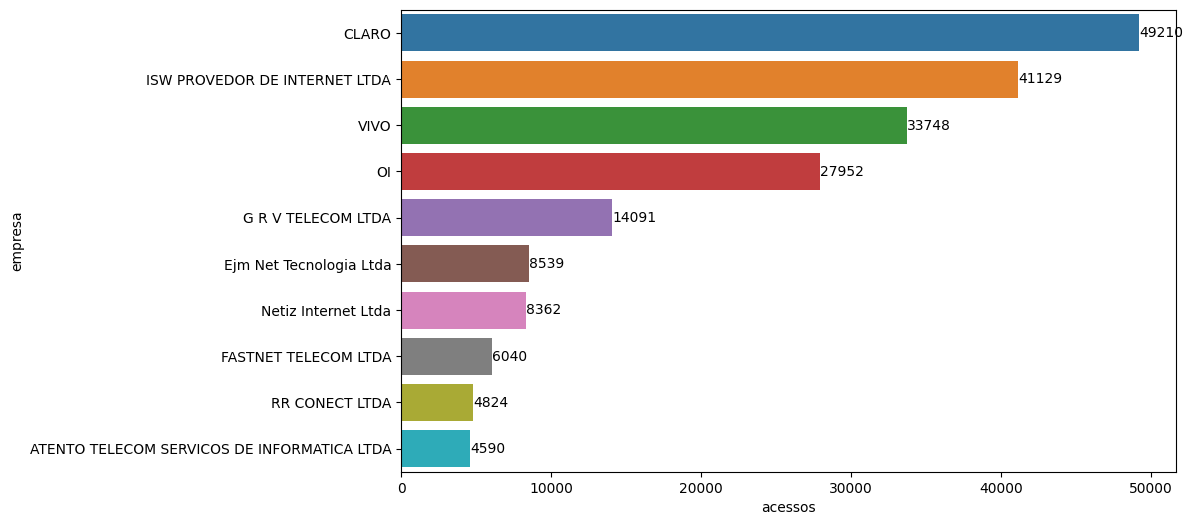

In [20]:
# Empresa x Acessos em 2021
empresa_acessos_2021 = data_estado.query("ano == 2021 and mes == 2")
empresa_acessos_2021

empresa_2021 = empresa_acessos_2021.groupby("empresa")['acessos'].sum()
fsum_empresa_2021 = convert_sums_frame(empresa_2021, ['empresa','acessos'])
acessos5_2021 = fsum_empresa_2021.sort_values(by='acessos', 
                      ascending=False ).head(10)
acessos5_2021

bar = sns.barplot(data=acessos5_2021, x="acessos",y="empresa", palette=colors)
bar.bar_label(bar.containers[0])
plt.show()

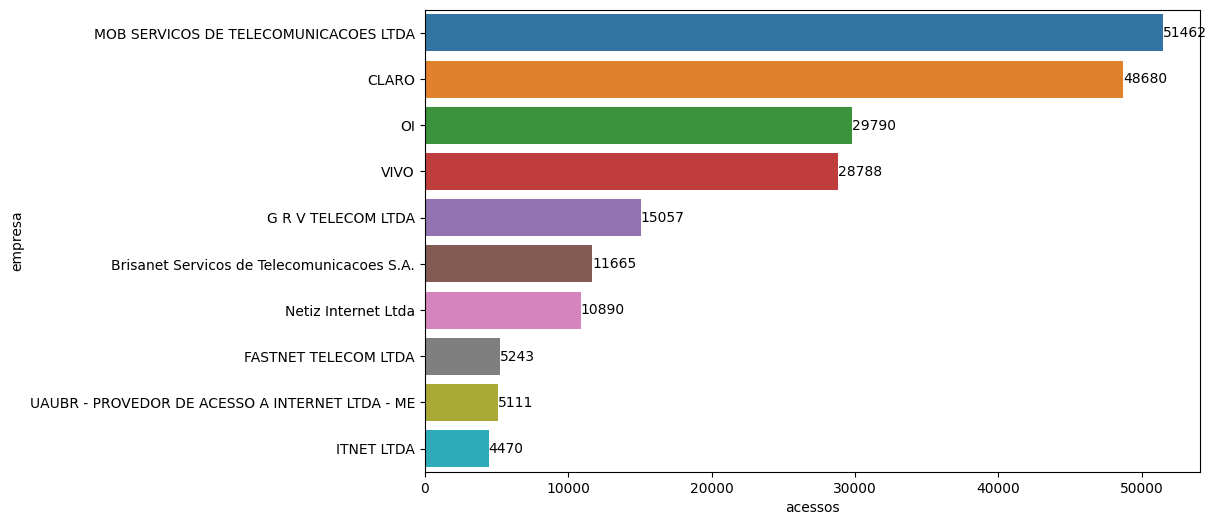

In [21]:
# Empresa x Acessos em 2022
empresa_acessos_2022 = data_estado.query("ano == 2022 and mes == 2")
empresa_acessos_2022

empresa_2022 = empresa_acessos_2022.groupby("empresa")['acessos'].sum()
fsum_empresa_2022 = convert_sums_frame(empresa_2022, ['empresa','acessos'])
acessos5_2022 = fsum_empresa_2022.sort_values(by='acessos', 
                      ascending=False ).head(10)
acessos5_2022

bar = sns.barplot(data=acessos5_2022, x="acessos",y="empresa",  palette=colors)
bar.bar_label(bar.containers[0])
plt.show()


### 4 e 5 Questão

* Quais empresas com maior número de contratos considerando o porte da empresa?

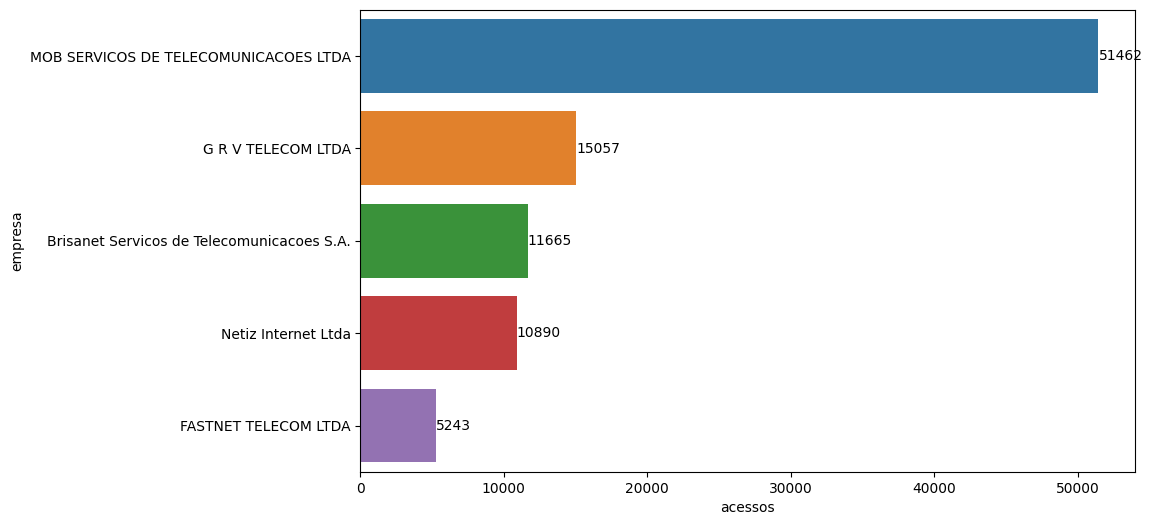

In [22]:
# Empresa x Acessos em 2022 - Pequeno porte
empresa_PP = data_estado.query("ano == 2022 and mes == 2 and porte_empresa == 'Pequeno Porte'")

empresa_PP = empresa_PP.groupby("empresa")['acessos'].sum()
fsum_empresa_PP = convert_sums_frame(empresa_PP, ['empresa','acessos'])
empresaPP_2022 = fsum_empresa_PP.sort_values(by='acessos', 
                      ascending=False ).head()
empresaPP_2022

bar = sns.barplot(data=empresaPP_2022, x="acessos",y="empresa", palette=colors)
bar.bar_label(bar.containers[0])
plt.show()

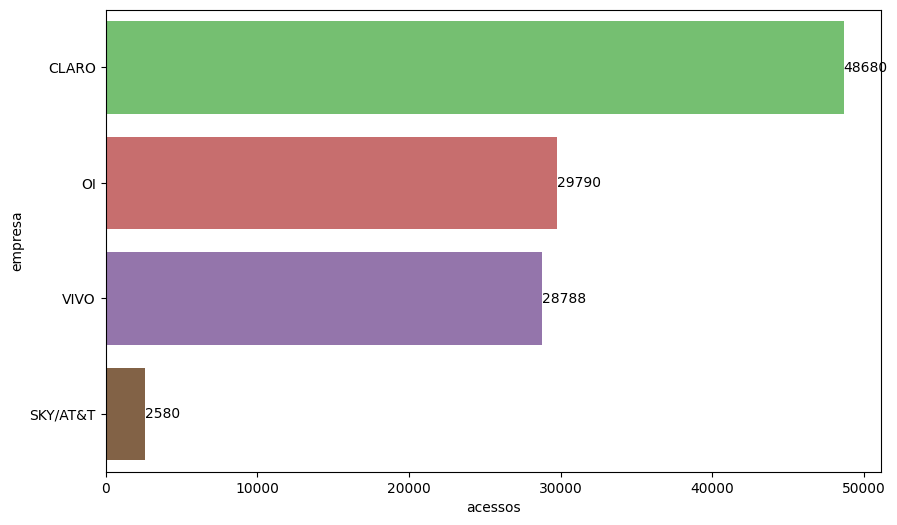

In [70]:
# Empresa x Acessos em 2022 - Grande porte
empresa_GP = data_estado.query("ano == 2022 and mes == 2 and porte_empresa == 'Grande Porte'")

empresa_GP = empresa_GP.groupby("empresa")['acessos'].sum()
fsum_empresa_GP = convert_sums_frame(empresa_GP, ['empresa','acessos'])
empresaGP_2022 = fsum_empresa_GP.sort_values(by='acessos', 
                      ascending=False ).head()


bar = sns.barplot(data=empresaGP_2022, x="acessos",y="empresa", palette=colors)
bar.bar_label(bar.containers[0])
plt.show()



## Analisando os Municípios

* Atualmente, usando os dados mais recentes da base, qual o perfil da distribuição de banda larga no estado de Sergipe?

In [24]:
data_municipios = data.query("ano == 2022 and mes == 2")
data_municipios = data_municipios.sort_values(by="id_municipio")
data_municipios

,ano,mes,sigla_uf,id_municipio,cnpj,empresa,porte_empresa,tecnologia,transmissao,velocidade,acessos
723,2022,2,SE,2800100,336701000104,Telecomunicacoes Brasileiras S.A. Telebras,Pequeno Porte,VSAT,Satélite,2Mbps a 12Mbps,1
40208,2022,2,SE,2800100,5206385000161,HUGHES TELECOMUNICACOES DO BRASIL LTDA,Pequeno Porte,VSAT,Satélite,2Mbps a 12Mbps,1
195907,2022,2,SE,2800100,76535764000143,OI,Grande Porte,FTTB,Fibra,12Mbps a 34Mbps,1
195906,2022,2,SE,2800100,76535764000143,OI,Grande Porte,ETHERNET,Cabo Metálico,512kbps a 2Mbps,4
195905,2022,2,SE,2800100,76535764000143,OI,Grande Porte,ADSL2,Cabo Metálico,2Mbps a 12Mbps,5
...,...,...,...,...,...,...,...,...,...,...,...
1355,2022,2,SE,2807600,6346446000159,Sitecnet Informatica Ltda,Pequeno Porte,FTTH,Fibra,> 34Mbps,1
1354,2022,2,SE,2807600,336701000104,Telecomunicacoes Brasileiras S.A. Telebras,Pequeno Porte,VSAT,Satélite,2Mbps a 12Mbps,5
1353,2022,2,SE,2807600,336701000104,Telecomunicacoes Brasileiras S.A. Telebras,Pequeno Porte,DWDM,Fibra,512kbps a 2Mbps,1
40344,2022,2,SE,2807600,5206385000161,HUGHES TELECOMUNICACOES DO BRASIL LTDA,Pequeno Porte,VSAT,Satélite,2Mbps a 12Mbps,6


In [ ]:
#Total de todos atributos

counts_empresa = data_municipios[['empresa']].value_counts()
frame_empresa = convert_sums_frame(counts_empresa, ['empresa','total'])
frame_empresa

counts_acessos = data_municipios[['acessos']].value_counts()
frame_acessos = convert_sums_frame(counts_acessos, ['acessos','total'])
frame_acessos

counts_tecnologia = data_municipios[['tecnologia']].value_counts()
frame_tecnologia = convert_sums_frame(counts_tecnologia, ['tecnologia','total'])
frame_tecnologia

counts_transmissao = data_municipios[['transmissao']].value_counts()
frame_transmissao = convert_sums_frame(counts_transmissao, ['transmissao','total'])
frame_transmissao

counts_velocidade = data_municipios[['velocidade']].value_counts()
frame_velocidade = convert_sums_frame(counts_velocidade, ['velocidade','total'])
frame_velocidade


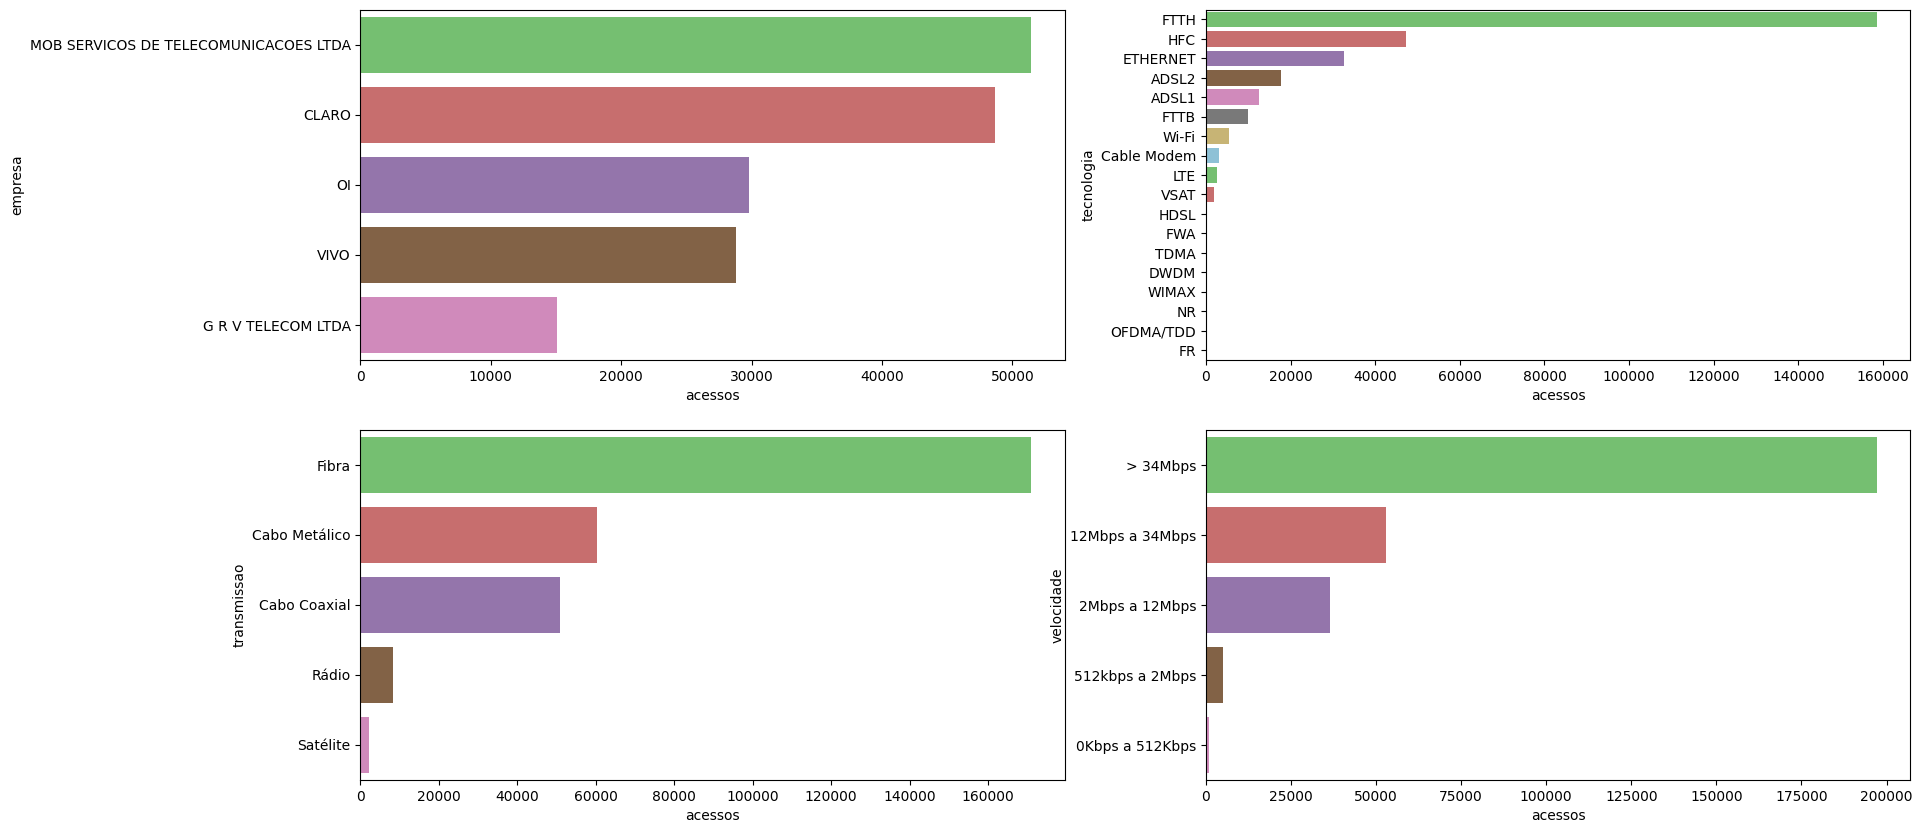

In [71]:
#Total de atributos x Acessos

sum_empresa = data_municipios.groupby("empresa")['acessos'].sum()
frame_sum_empresa = convert_sums_frame(sum_empresa, ['empresa','acessos'])
frame_sum_empresa = frame_sum_empresa.sort_values(by='acessos', ascending=False)

cinco_mais = frame_sum_empresa[:5]

sum_tecnologia = data_municipios.groupby("tecnologia")['acessos'].sum()
frame_sum_tecnologia = convert_sums_frame(sum_tecnologia, ['tecnologia','acessos'])
frame_sum_tecnologia = frame_sum_tecnologia.sort_values(by='acessos', ascending=False)
frame_sum_tecnologia

sum_transmissao = data_municipios.groupby("transmissao")['acessos'].sum()
frame_sum_transmissao = convert_sums_frame(sum_transmissao, ['transmissao','acessos'])
frame_sum_transmissao = frame_sum_transmissao.sort_values(by='acessos', ascending=False)
frame_sum_transmissao

sum_velocidade = data_municipios.groupby("velocidade")['acessos'].sum()
frame_sum_velocidade = convert_sums_frame(sum_velocidade, ['velocidade','acessos'])
frame_sum_velocidade = frame_sum_velocidade.sort_values(by='acessos', ascending=False)
frame_sum_velocidade

fig, axs = plt.subplots(ncols=2,nrows=2,figsize=(20,10))
sns.barplot(data=cinco_mais,x='acessos',y='empresa',ax=axs[0][0], palette=colors)
sns.barplot(data=frame_sum_tecnologia,x='acessos', y='tecnologia',ax=axs[0][1], palette=colors)
sns.barplot(data=frame_sum_transmissao,x='acessos',y='transmissao',ax=axs[1][0], palette=colors)
sns.barplot(data=frame_sum_velocidade,x='acessos',y='velocidade',ax=axs[1][1], palette=colors)
plt.show()


In [36]:
# Informações sobre os municípios
data_pequeno_porte = data_municipios.query('porte_empresa == "Pequeno Porte"')
data_grande_porte = data_municipios.query('porte_empresa == "Grande Porte"')

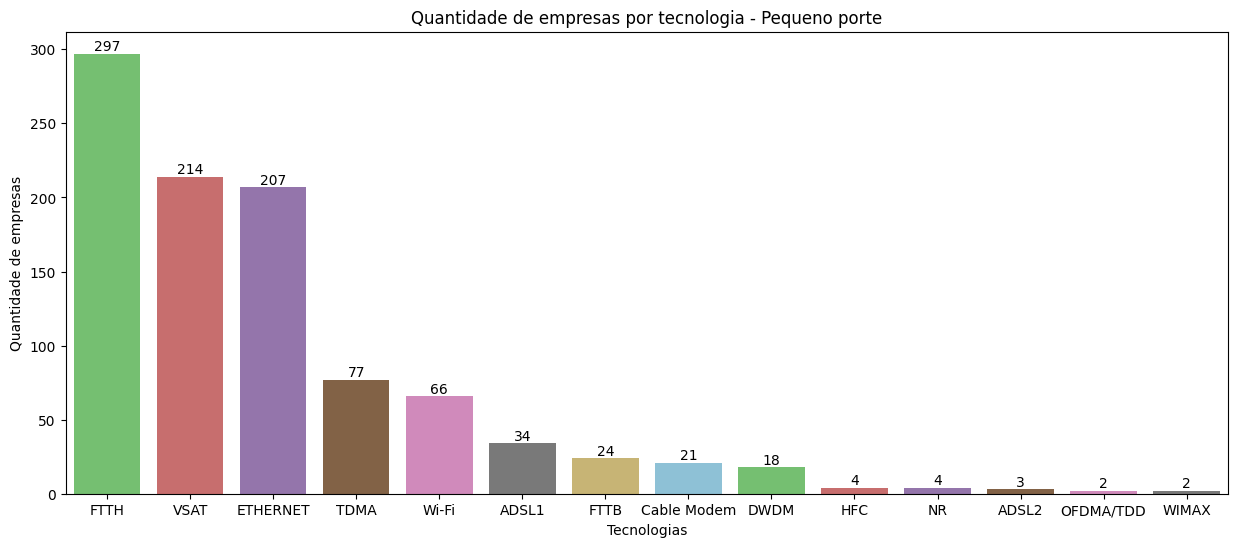

In [37]:
# Uso das tecnologias por empresas
datatb = data_pequeno_porte.groupby("tecnologia")['empresa'].count()
datatb = convert_sums_frame(datatb, ['tecnologia','empresa'])
datatb = datatb.sort_values(by='empresa', ascending=False )

bar = sns.barplot(data=datatb, x="tecnologia",y="empresa", palette=colors)
bar.set(xlabel='Tecnologias',ylabel='Quantidade de empresas')
plt.title('Quantidade de empresas por tecnologia - Pequeno porte')
plt.rcParams["figure.figsize"] = (15, 6)
bar.bar_label(bar.containers[0])
plt.show()

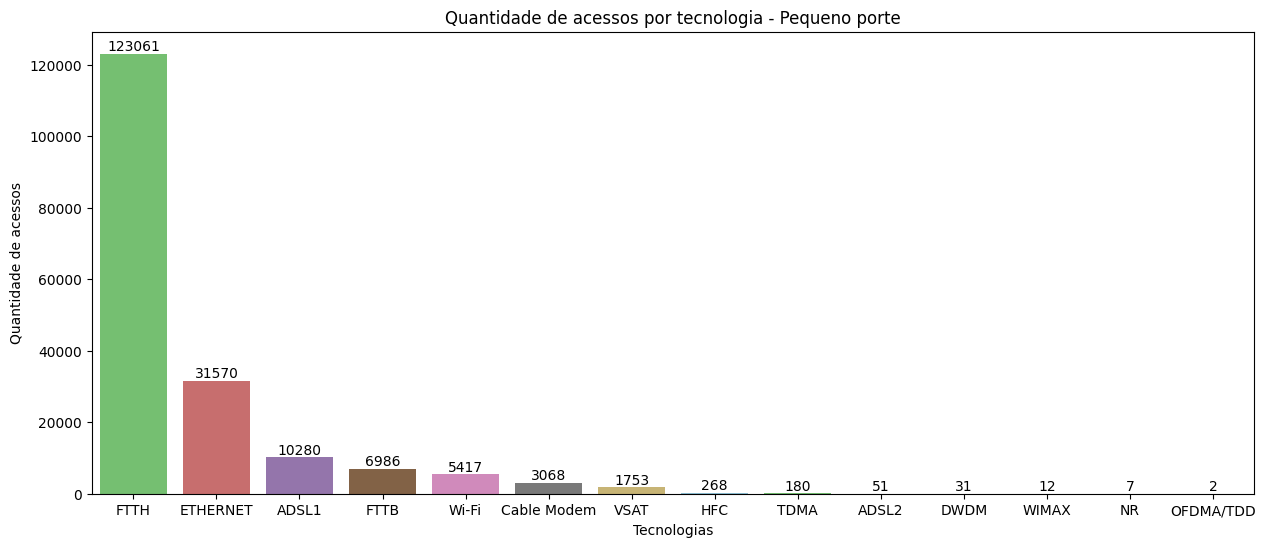

In [38]:
# Quantidade de acessos por tecnologia
datatb = data_pequeno_porte.groupby("tecnologia")['acessos'].sum()
datatb = convert_sums_frame(datatb, ['tecnologia','acessos'])
datatb = datatb.sort_values(by='acessos', ascending=False )

bar = sns.barplot(data=datatb, x="tecnologia",y="acessos", palette=colors)
bar.set(xlabel='Tecnologias',ylabel='Quantidade de acessos')
plt.title('Quantidade de acessos por tecnologia - Pequeno porte')
plt.rcParams["figure.figsize"] = (15, 6)
bar.bar_label(bar.containers[0])
plt.show()

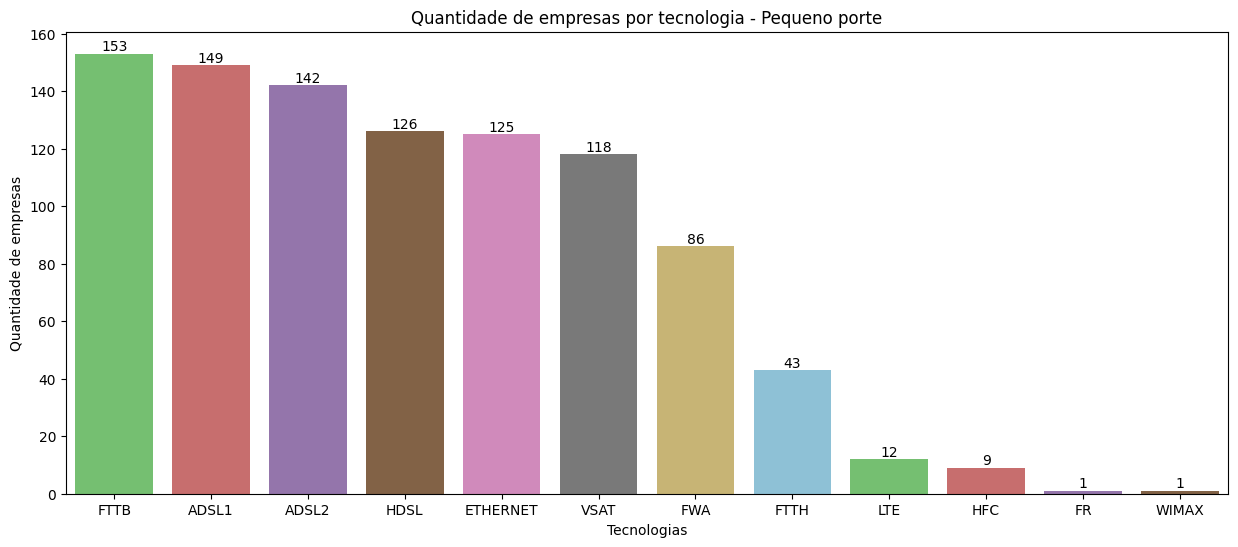

In [39]:
# Uso das tecnologias por empresas de pequeno porte
datatb = data_grande_porte.groupby("tecnologia")['empresa'].count()
datatb = convert_sums_frame(datatb, ['tecnologia','empresa'])
datatb = datatb.sort_values(by='empresa', ascending=False )

bar = sns.barplot(data=datatb, x="tecnologia",y="empresa", palette=colors)
bar.set(xlabel='Tecnologias',ylabel='Quantidade de empresas')
plt.title('Quantidade de empresas por tecnologia - Pequeno porte')
plt.rcParams["figure.figsize"] = (15, 6)
bar.bar_label(bar.containers[0])
plt.show()

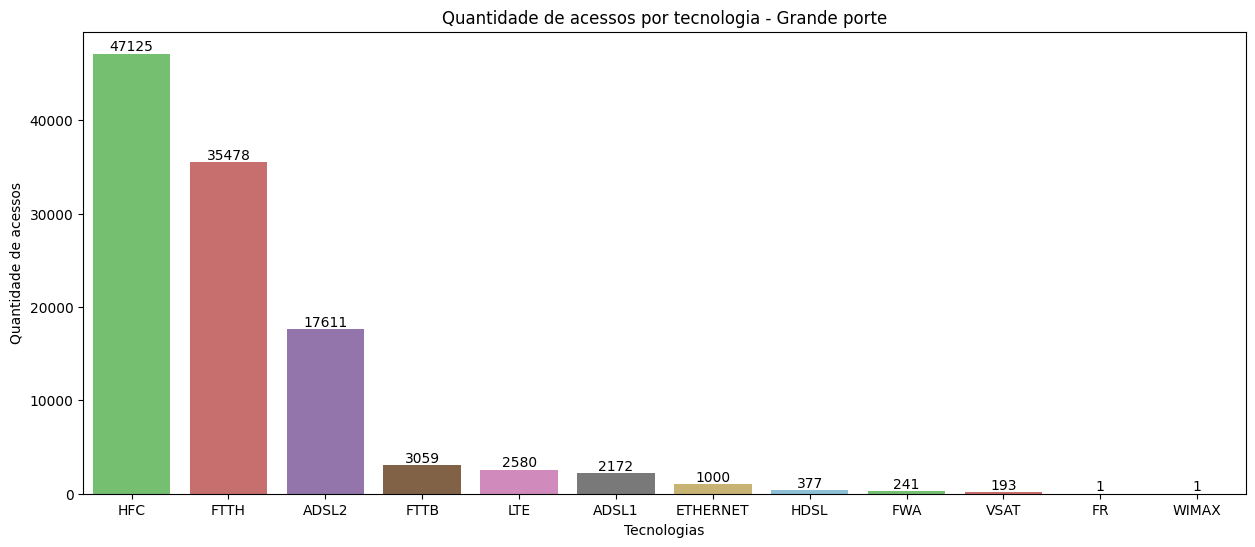

In [40]:
# Quantidade de acessos por tecnologia
datatb = data_grande_porte.groupby("tecnologia")['acessos'].sum()
datatb = convert_sums_frame(datatb, ['tecnologia','acessos'])
datatb = datatb.sort_values(by='acessos', ascending=False )

bar = sns.barplot(data=datatb, x="tecnologia",y="acessos", palette=colors)
bar.set(xlabel='Tecnologias',ylabel='Quantidade de acessos')
plt.title('Quantidade de acessos por tecnologia - Grande porte')
plt.rcParams["figure.figsize"] = (15, 6)
bar.bar_label(bar.containers[0])
plt.show()